In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('pre_processed_train.csv')
df_test = pd.read_csv('pre_processed_test.csv')

In [3]:
df_train.drop(columns='Unnamed: 0', inplace = True)
df_test.drop(columns='Unnamed: 0', inplace = True)

I got the error "endog must be in the unit interval" when running a logistic regression, meaning the target variable needs to be between 0 and 1. Changing that here:

In [4]:
# 1 represents non-functional or needs repair water pumps. 0 represents functional water pumps.
def change_target(row):
    if row['status_group'] == 3:
        return 0
    else:
        return 1
    
df_train['status_group'] = df_train.apply(lambda row: change_target(row), axis = 1)
df_test['status_group'] = df_test.apply(lambda row: change_target(row), axis = 1)

In [5]:
train_df, validate_df = train_test_split(df_train,
                                     test_size=0.2, 
                                     random_state=42)

# EDA

Using just numerical variables:

In [6]:
numerical_df = df_train[['gps_height', 'amount_tsh', 'population', 
                         'public_meeting', 'permit', 'status_group']]
numerical_df.head()

,gps_height,amount_tsh,population,public_meeting,permit,status_group
0,1390,6000.0,109,1,0,0
1,686,25.0,250,1,1,0
2,263,0.0,58,1,1,1
3,0,20.0,1,1,1,0
4,0,0.0,0,1,1,1


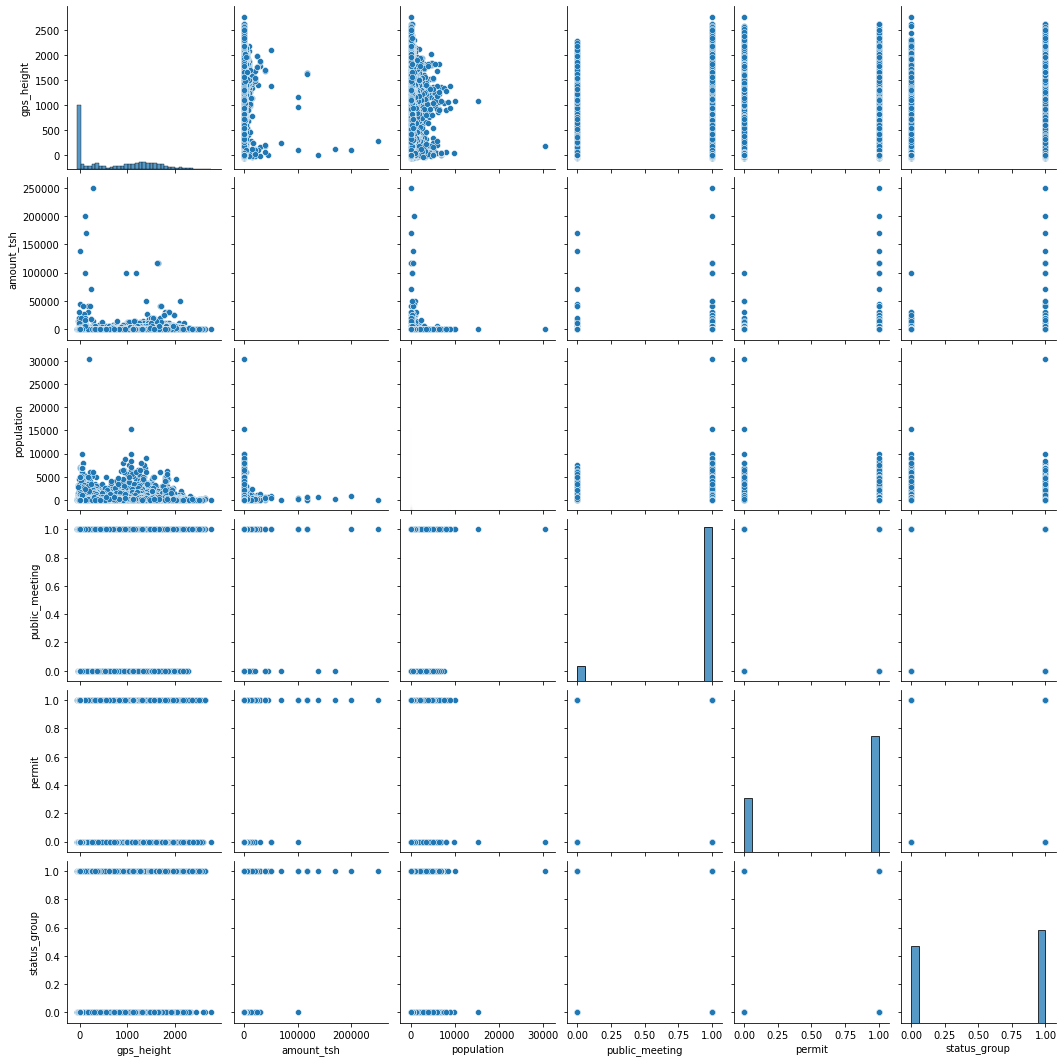

In [7]:
sns.pairplot(numerical_df)

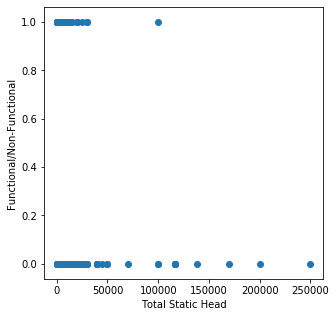

In [89]:
fig, ax = plt.subplots(figsize=(5,5))

plt.ylabel('Functional/Non-Functional')
plt.xlabel('Total Static Head')

plt.scatter(x=df_train['amount_tsh'], y=df_train['status_group'])

In [99]:
fake_df = df_train[df_train['amount_tsh'] > 110000]
fake_df[['amount_tsh', 'status_group']]

,amount_tsh,status_group
4691,117000.0,0
8370,138000.0,0
8914,117000.0,0
18576,250000.0,0
19109,200000.0,0
31423,117000.0,0
37237,117000.0,0
37817,170000.0,0
38157,117000.0,0


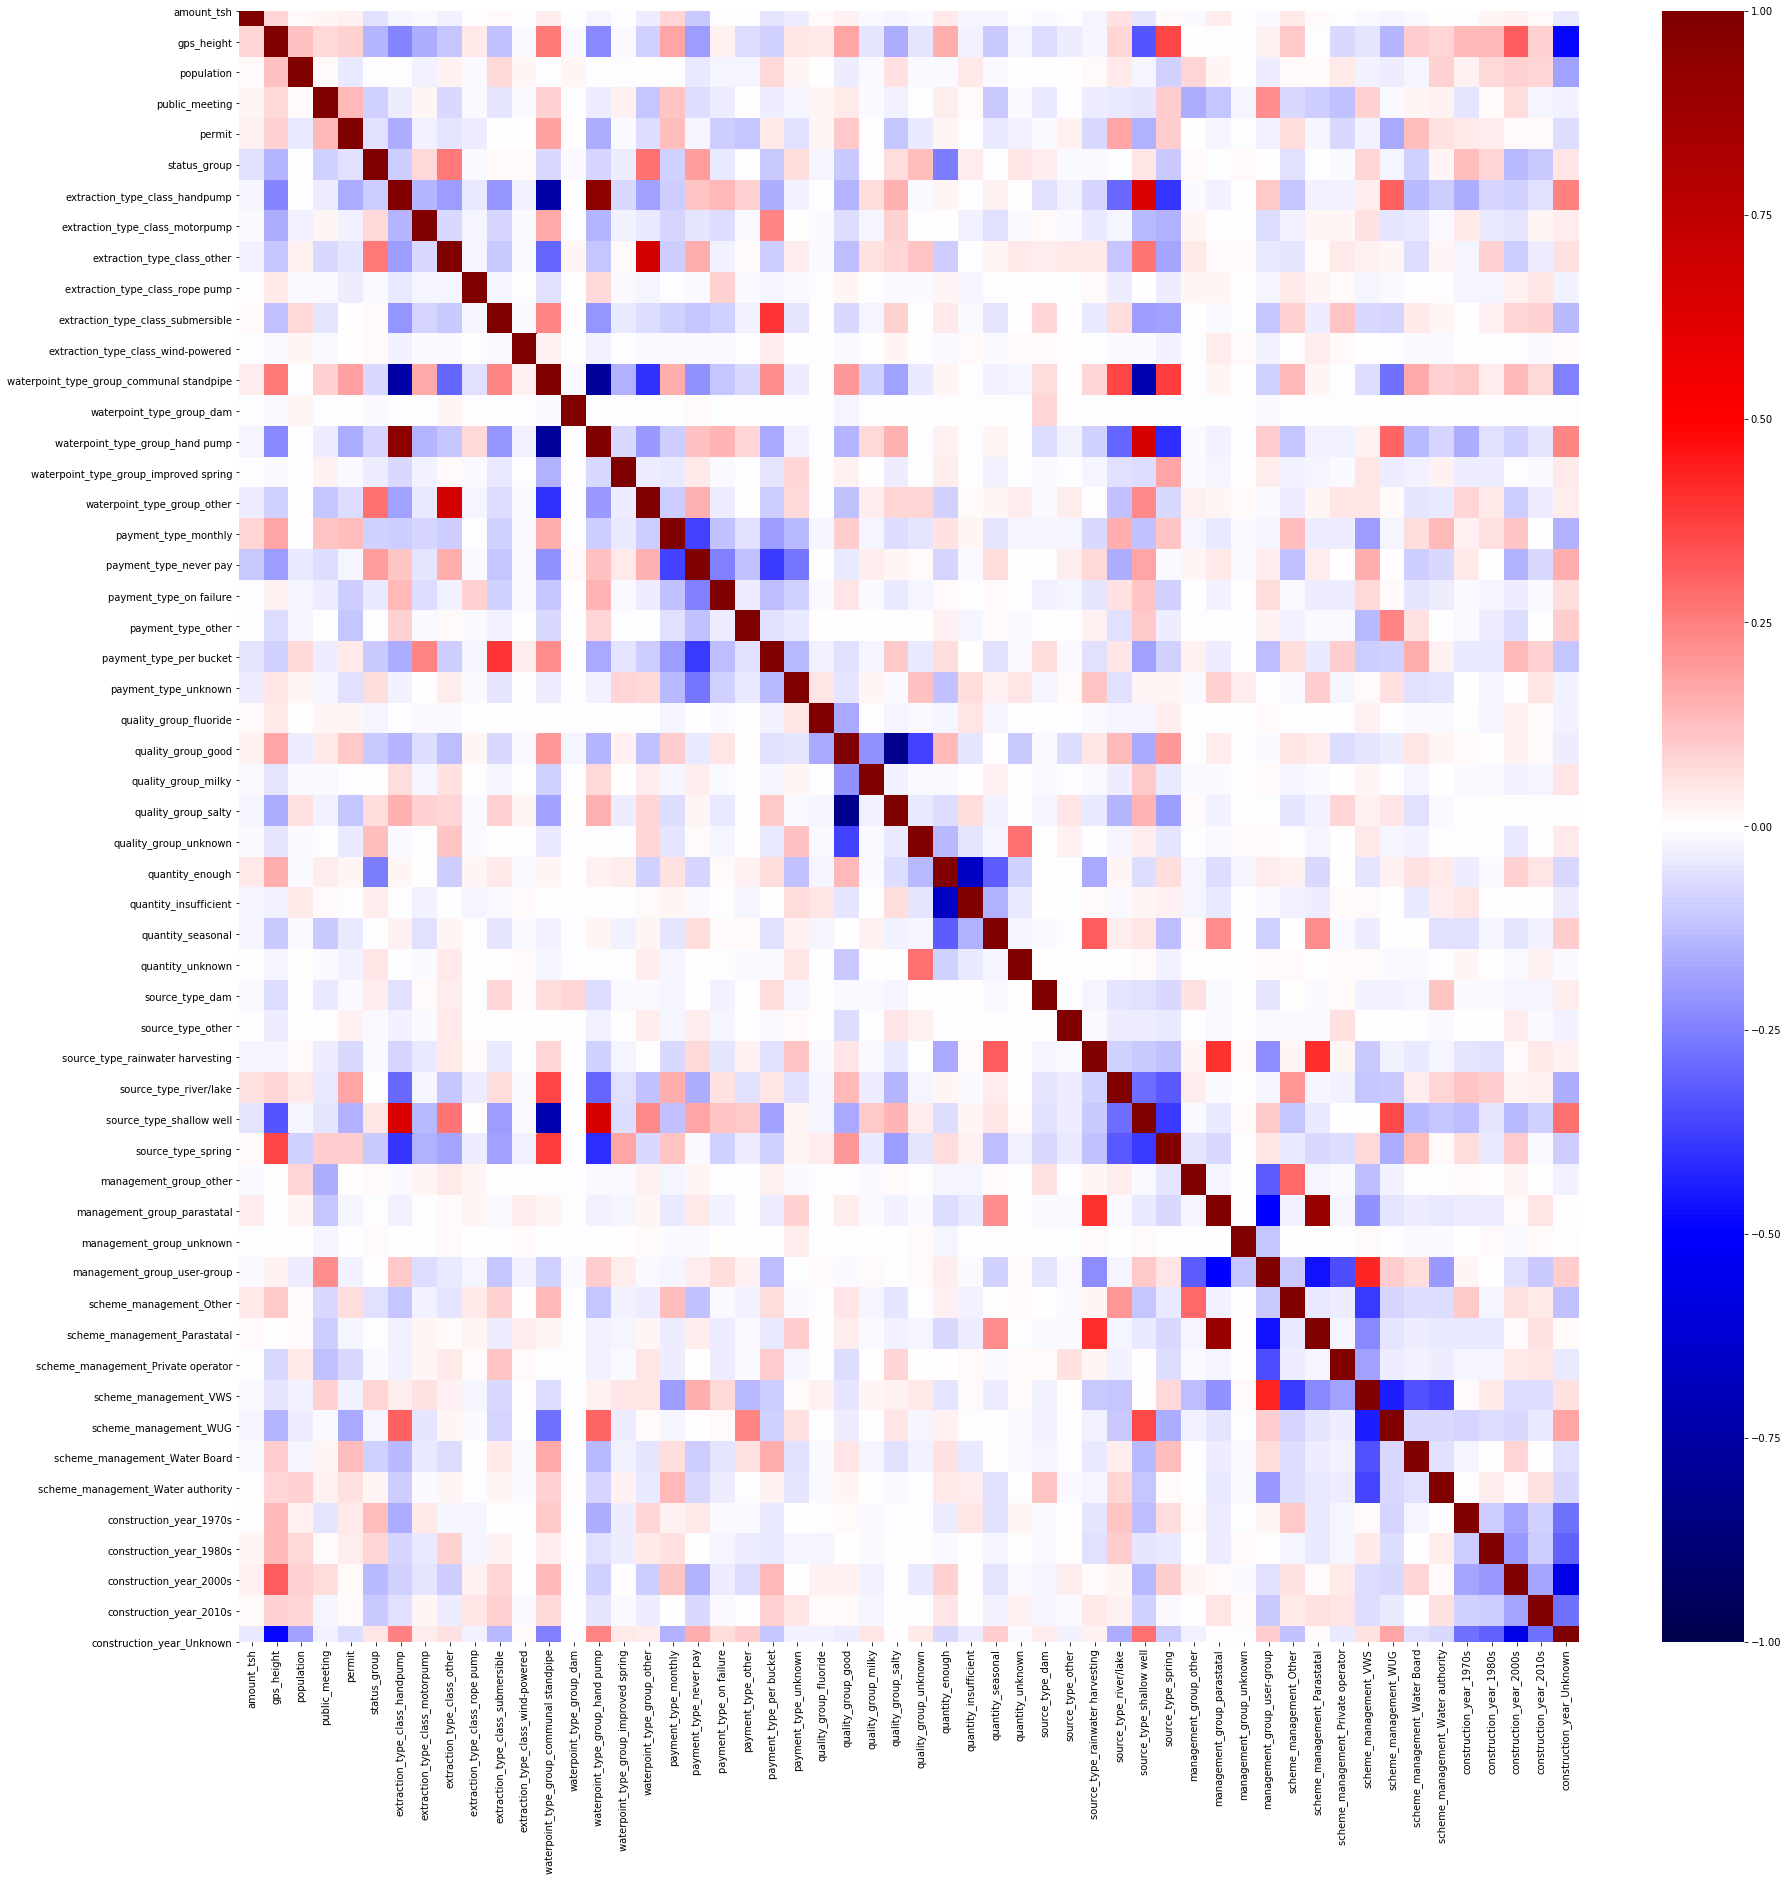

In [62]:
fig, ax = plt.subplots(figsize=(30, 30))

sns.heatmap(df_train.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);

plt.show()

(I ignored strong negative correlations within categories, since those make sense and should be there.)


Notable Correlations:
* gps_height and not unknown construction year (positive). Reason unknown. Also some negative correlation with 2000s (negative).
* gps_height and source type spring (positive). gps_height and source type shallow well (negative).  
* **Take-aways**: 
    * Gps height and year of construction are a bit correlated. It looks like in the 2000s more low gps height water pumps were built.
    * Gps height and some source types are a correlated. This makes sense, since shallow wells are likely at low gps heights.


* extraction type class handpump and source type spring (negative), source type shallow well (positive), and source type river lake (a little negative)
* extraction type class handpump and waterpoint type group hand pump (very correlated, positive). Extraction type class handpump and waterpoint type group communal standpipe (very correlated, negative).
* extraction type class other and waterpoint type group other (very correlated, positive)
* extraction type class submersible and payment type per bucket (positive)
* **Take-aways**:
    * Handpumps typically draw from springs or rivers/lakes, and are less likely to draw from shallow wells.
    * **When the extraction is with a hand pump, the "waterpoint type" is also a handpump. One of these needs to be removed. The "other" categories for extraction and waterpoint type are also highly correlated, and one should be removed.**
    * Submersible pumps are usually paid for by the bucket.
  
  
* waterpoint type group communal standpipe and source type spring (very correlated, positive), source type shallow well (very correlated, negative), and source type shallow lake (very correlated, positive).
* waterpoint type group hand pump and source type spring (very correlated, negative), source type shallow well (very correlated, positive), and source type shallow lake (very correlated, negative). (This is exactly like the extraction type class handpump.)
* **Take-aways**:
    * Communal standpipes typically draw from springs or shallow lakes, and are less likely to draw from shallow wells.


* source type rainwater harvesting and scheme management parastatal (positive).
* source type shallow well and scheme management WUG (positive)
* **Take-aways**:
    * Water pumps that are managed by parastatal organizations tend to draw from rainwater harvesting.
    * Water pumps that are managed by WUG tend to draw from shallow wells.


* management group parastatal and scheme management parastatal (very highly correlated, positive).
* management group user group and scheme management VWS (negative), scheme management parastatal (negative)
    * **There are some strong correlations between management group and scheme management, so scheme management should be dropped.**


Notes:
* status group (TARGET) good. Some correlation with quantity enough, waterpoint type other, and extraction type other.

In [7]:
df_train.drop(columns='extraction_type_class_handpump', inplace = True)
df_test.drop(columns='extraction_type_class_handpump', inplace = True)

df_train.drop(columns='scheme_management_Private operator', inplace = True)
df_test.drop(columns='scheme_management_Private operator', inplace = True)

df_train.drop(columns='scheme_management_Other', inplace = True)
df_test.drop(columns='scheme_management_Other', inplace = True)

df_train.drop(columns='scheme_management_Parastatal', inplace = True)
df_test.drop(columns='scheme_management_Parastatal', inplace = True)

df_train.drop(columns='scheme_management_VWS', inplace = True)
df_test.drop(columns='scheme_management_VWS', inplace = True)

df_train.drop(columns='scheme_management_WUG', inplace = True)
df_test.drop(columns='scheme_management_WUG', inplace = True)

df_train.drop(columns='scheme_management_Water Board', inplace = True)
df_test.drop(columns='scheme_management_Water Board', inplace = True)

df_train.drop(columns='scheme_management_Water authority', inplace = True)
df_test.drop(columns='scheme_management_Water authority', inplace = True)

df_train.drop(columns='waterpoint_type_group_other', inplace = True)
df_test.drop(columns='waterpoint_type_group_other', inplace = True)

df_train.head()

,amount_tsh,gps_height,population,public_meeting,permit,status_group,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,...,source_type_spring,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,construction_year_1970s,construction_year_1980s,construction_year_2000s,construction_year_2010s,construction_year_Unknown
0,6000.0,1390,109,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,25.0,686,250,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0.0,263,58,1,1,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
3,20.0,0,1,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,0.0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [8]:
df_train.describe()

,amount_tsh,gps_height,population,public_meeting,permit,status_group,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,...,source_type_spring,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,construction_year_1970s,construction_year_1980s,construction_year_2000s,construction_year_2010s,construction_year_Unknown
count,39875.000000,39875.000000,39875.000000,39875.000000,39875.000000,39875.000000,39875.000000,39875.000000,39875.000000,39875.000000,...,39875.000000,39875.000000,39875.000000,39875.000000,39875.000000,39875.000000,39875.000000,39875.000000,39875.000000,39875.000000
mean,353.103534,681.349517,172.077567,0.909041,0.680351,0.451436,0.053266,0.091235,0.004339,0.103448,...,0.304727,0.010909,0.026708,0.001455,0.899085,0.079699,0.097329,0.266759,0.080627,0.466984
std,2891.506826,698.732708,472.551974,0.287555,0.466346,0.497642,0.224567,0.287947,0.065726,0.304547,...,0.460298,0.103877,0.161232,0.038111,0.301220,0.270830,0.296409,0.442271,0.272265,0.498915
min,0.000000,-63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,405.000000,25.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,1323.000000,200.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,250000.000000,2770.000000,30500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [107]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39875 entries, 0 to 39874
Data columns (total 45 columns):
amount_tsh                                  39875 non-null float64
gps_height                                  39875 non-null int64
population                                  39875 non-null int64
public_meeting                              39875 non-null int64
permit                                      39875 non-null int64
status_group                                39875 non-null int64
extraction_type_class_motorpump             39875 non-null int64
extraction_type_class_other                 39875 non-null int64
extraction_type_class_rope pump             39875 non-null int64
extraction_type_class_submersible           39875 non-null int64
extraction_type_class_wind-powered          39875 non-null int64
waterpoint_type_group_communal standpipe    39875 non-null int64
waterpoint_type_group_dam                   39875 non-null int64
waterpoint_type_group_hand pump             

# Model Summary Using Statsmodels

In [9]:
import statsmodels.api as sm

In [10]:
# Employing statsmodels for a Logistic Regression
lm_1 = sm.Logit(train_df['status_group'],  # with statsmodels, `y` comes first
                sm.add_constant(train_df[['gps_height']]))  # and then `x`

lm_1 = lm_1.fit()

lm_1.summary()

Optimization terminated successfully.
         Current function value: 0.678516
         Iterations 4


/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           status_group   No. Observations:                31900
Model:                          Logit   Df Residuals:                    31898
Method:                           MLE   Df Model:                            1
Date:                Wed, 03 Feb 2021   Pseudo R-squ.:                 0.01465
Time:                        15:18:59   Log-Likelihood:                -21645.
converged:                       True   LL-Null:                       -21967.
Covariance Type:            nonrobust   LLR p-value:                5.283e-142
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0857      0.016      5.464      0.000       0.055       0.116
gps_height    -0.0004   1.65e-05    -25.094      0.000      -0.000      -0.000
==============================================================================
"""

# Multiple Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import accuracy_score

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
X = df_train.drop(columns='status_group')
y = df_train['status_group']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [15]:
#Scale since there are multiple features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # Scale test features

In [71]:
# Find the best C value without polynomial features
C = [.001, .1, 1, 10]

for c in C:
    # Regularize features. L1 shrinks coefficients to 0
    logistic_model = LogisticRegression(penalty='l1', solver='liblinear', C=c) 

    #Fit model on training data
    logistic_model.fit(X_train, y_train) 
    
    print("C is:", c)
    for feature, coef in zip(X.columns, logistic_model.coef_[0]):
        print(feature, ':', f'{coef:.2f}')
    print('Training accuracy:', logistic_model.score(X_train, y_train))
    print('Test accuracy:', logistic_model.score(X_test, y_test))
    print('')

C is: 0.001
amount_tsh : 0.00
gps_height : -0.04
population : 0.00
public_meeting : 0.00
permit : 0.00
extraction_type_class_motorpump : 0.04
extraction_type_class_other : 0.39
extraction_type_class_rope pump : 0.00
extraction_type_class_submersible : 0.00
extraction_type_class_wind-powered : 0.00
waterpoint_type_group_communal standpipe : 0.00
waterpoint_type_group_dam : 0.00
waterpoint_type_group_hand pump : 0.00
waterpoint_type_group_improved spring : 0.00
payment_type_monthly : 0.00
payment_type_never pay : 0.17
payment_type_on failure : 0.00
payment_type_other : 0.00
payment_type_per bucket : 0.00
payment_type_unknown : 0.00
quality_group_fluoride : 0.00
quality_group_good : 0.00
quality_group_milky : 0.00
quality_group_salty : 0.00
quality_group_unknown : 0.05
quantity_enough : -0.40
quantity_insufficient : -0.06
quantity_seasonal : -0.02
quantity_unknown : 0.00
source_type_dam : 0.00
source_type_other : 0.00
source_type_rainwater harvesting : 0.00
source_type_river/lake : 0.00
s

In [26]:
# Find the best C value with polynomial features
C = [.001, .1, 1, 10]

p = PolynomialFeatures(degree=2)
X_train_poly = p.fit_transform(X_train)

for c in C:
    # Regularize features. L1 shrinks coefficients to 0
    logistic_model = LogisticRegression(penalty='l1', solver='liblinear', C=c) 

    #Fit model on training data
    logistic_model.fit(X_train_poly, y_train) 
    
    print("C is:", c)
    myList = list(zip(p.get_feature_names(X.columns),logistic_model.coef_[0]))
    for element in myList:
        print(element[0], ": ", round(element[1], 2))
    print('Training accuracy:', logistic_model.score(X_train_poly, y_train))
    print('Test accuracy:', logistic_model.score(p.transform(X_test), y_test))
    print('')

C is: 0.001
('1', array([0.        , 0.        , 0.        , ..., 0.04783334, 0.        ,
       0.        ]))
Training accuracy: 0.7296551724137931
Test accuracy: 0.7221316614420062



KeyboardInterrupt: 

logistic_model = LogisticRegression(penalty='l1', solver='saga', C=.001)
logistic_model.fit(X_train_poly, y_train) 
myList = list(zip(p.get_feature_names(X.columns),logistic_model.coef_[0]))
for element in myList:
        print(element[0], ": ", round(element[1], 2))

Final?

In [16]:
logistic_model = LogisticRegression(penalty='l1', solver='liblinear', C=.1)

In [17]:
logistic_model.fit(X_train, y_train) #Fit model on training data

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
preds = logistic_model.predict(X_test) # Make predictions using test features

In [19]:
preds

array([1, 0, 1, ..., 1, 1, 0])

In [20]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [21]:
def make_confusion_matrix(model, threshold=.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    fig, ax = plt.subplots(figsize=(8,6))
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    functional_confusion = confusion_matrix(y_test, y_predict)

    #Print the sns map
    group_names = ['True Neg','False Po','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
            functional_confusion.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
            functional_confusion.flatten()/np.sum(functional_confusion)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    xlabels = ['functional', 'non-functional']
    ylabels = ['functional', 'non-functional']
    sns.heatmap(functional_confusion, annot=labels, fmt='', cmap='Blues', 
                xticklabels=xlabels, yticklabels=ylabels)
    ax.set_ylim([2,0])
    plt.xlabel('prediction')
    plt.ylabel('actual')
    
    #Princt various scores/metrics
    print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
    print("F1 Score: ", f1_score(y_test, y_predict))
    print("ROC AUC score : ", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
    
    print("Accuracy score: ", accuracy_score(y_test, y_predict))
    
    print('Training accuracy:', model.score(X_train, y_train))
    print('Test accuracy:', model.score(X_test, y_test))


Precision: 0.7920,   Recall: 0.5451
F1 Score:  0.6457690433652753
ROC AUC score :  0.7886328975731198
Accuracy score:  0.7265203761755485
Training accuracy: 0.7352351097178683
Test accuracy: 0.7265203761755485


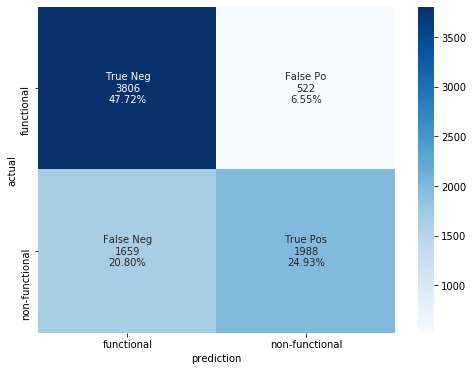

In [22]:
make_confusion_matrix(logistic_model)

In [23]:
# Let's see how our confusion matrix changes with changes to the cutoff! 

from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(logistic_model, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [98]:
for feature, coef in zip(X.columns, logistic_model.coef_[0]):
    print(feature, ':', f'{coef:.2f}')

amount_tsh : -0.21
gps_height : -0.12
population : -0.01
public_meeting : -0.13
permit : -0.10
extraction_type_class_motorpump : 0.11
extraction_type_class_other : 0.35
extraction_type_class_rope pump : 0.00
extraction_type_class_submersible : 0.08
extraction_type_class_wind-powered : 0.03
waterpoint_type_group_communal standpipe : -0.54
waterpoint_type_group_dam : -0.06
waterpoint_type_group_hand pump : -0.69
waterpoint_type_group_improved spring : -0.18
payment_type_monthly : 0.13
payment_type_never pay : 0.39
payment_type_on failure : 0.05
payment_type_other : 0.08
payment_type_per bucket : -0.10
payment_type_unknown : 0.23
quality_group_fluoride : -0.03
quality_group_good : 0.00
quality_group_milky : -0.06
quality_group_salty : 0.03
quality_group_unknown : 0.14
quantity_enough : -2.02
quantity_insufficient : -1.54
quantity_seasonal : -0.96
quantity_unknown : -0.22
source_type_dam : 0.01
source_type_other : -0.10
source_type_rainwater harvesting : -0.17
source_type_river/lake : -0.1

## ROC - Logistic Regression

Logistic: ROC AUC=0.789


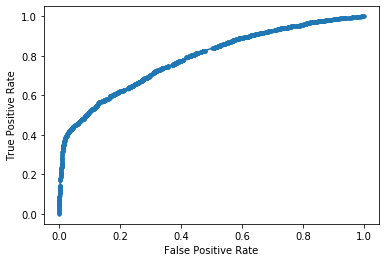

In [174]:
# Predict probabilities
lr_probs = logistic_model.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate score
lr_auc = roc_auc_score(y_test, lr_probs)

# print score
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate ROC curve
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the ROC curve
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

Each one of these points represents a different probability threshold, and the area under the curve (AUC) can be thought of as a measure of separability between the two classes (functional or non-functional) when we only use the features of the model. A perfect right angle is a perfect model (unrealistic), and a diagonal line is just as good as a flip of the coin.

# KNN Model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [176]:
X = df_train.drop(columns='status_group')
y = df_train['status_group']

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [178]:
#Scale since there are multiple features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # Scale test features

In [179]:
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

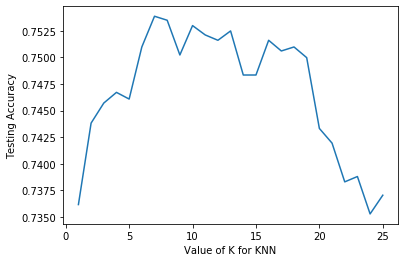

In [180]:
%matplotlib inline

plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [181]:
# Find and print the best k value and its corresponding score
index = 0
max_num = 0
for k in scores_list:
    if k > max_num:
        max_num = k
        max_index = index
        index+=1
    else:
        index+=1
print("The best k is ", max_index, 
      ' which has a score of ', round(max_num, 2))

The best k is  6  which has a score of  0.75


In [182]:
# Using KNN with the best k value
knn = KNeighborsClassifier(n_neighbors=index)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [183]:
# Let's see how our confusion matrix changes with changes to the cutoff! 

from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(knn, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

## ROC - KNN

Logistic: ROC AUC=0.813


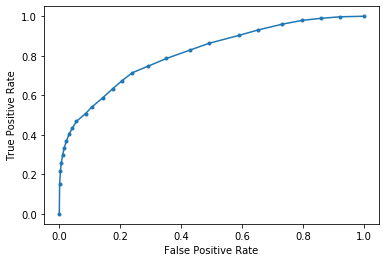

In [184]:
# Predict probabilities
knn_probs = knn.predict_proba(X_test)

# keep probabilities for the positive outcome only
knn_probs = knn_probs[:, 1]

# calculate score
knn_auc = roc_auc_score(y_test, knn_probs)

# print score
print('Logistic: ROC AUC=%.3f' % (knn_auc))

# calculate ROC curve
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)

# plot the ROC curve
plt.plot(knn_fpr, knn_tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

# Random Forest Model

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [101]:
#Split data
X = df_train.drop(columns='status_group')
y = df_train['status_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [102]:
#Create classifier
clf=RandomForestClassifier(n_estimators=100)

#Train model
clf.fit(X_train,y_train)

#Predict y values for test set
y_pred=clf.predict(X_test)

In [103]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7810749811920087


In [104]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

gps_height                                  0.250783
population                                  0.147791
quantity_enough                             0.063295
amount_tsh                                  0.063245
extraction_type_class_other                 0.053332
quantity_insufficient                       0.036842
permit                                      0.027285
payment_type_never pay                      0.023604
quantity_seasonal                           0.023082
waterpoint_type_group_communal standpipe    0.019242
waterpoint_type_group_hand pump             0.018694
management_group_user-group                 0.017886
source_type_spring                          0.017163
public_meeting                              0.017114
construction_year_2000s                     0.016719
source_type_shallow well                    0.016141
construction_year_1970s                     0.015693
construction_year_2010s                     0.013120
extraction_type_class_submersible           0.

No handles with labels found to put in legend.


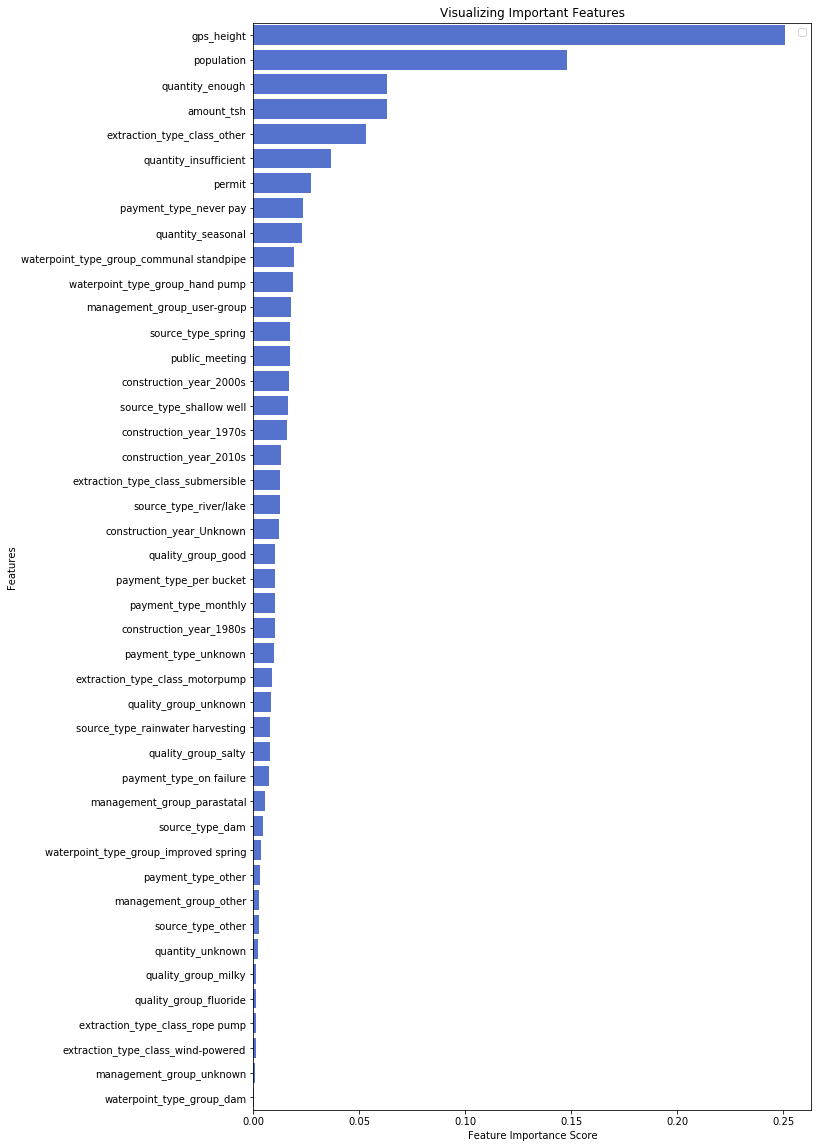

In [105]:
fig, ax = plt.subplots(figsize=(10, 20))
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index, color='royalblue')
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [106]:
# Let's see how our confusion matrix changes with changes to the cutoff! 

from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(clf, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

## ROC - Random Forest

Logistic: ROC AUC=0.856


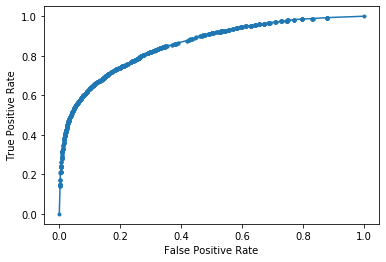

In [192]:
# Predict probabilities
clf_probs = clf.predict_proba(X_test)

# keep probabilities for the positive outcome only
clf_probs = clf_probs[:, 1]

# calculate score
clf_auc = roc_auc_score(y_test, clf_probs)

# print score
print('Logistic: ROC AUC=%.3f' % (clf_auc))

# calculate ROC curve
clf_fpr, clf_tpr, _ = roc_curve(y_test, clf_probs)

# plot the ROC curve
plt.plot(clf_fpr, clf_tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

# XGBoost

In [60]:
import xgboost as xgb
from xgboost import XGBClassifier

In [61]:
X = df_train.drop(columns='status_group')
y = df_train['status_group']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2018)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2019)

In [63]:
gbm = xgb.XGBClassifier( 
                       n_estimators=30000, #arbitrary large number
                       max_depth=3,
                       objective="reg:squarederror",
                       learning_rate=.1, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.8
                      )

eval_set=[(X_train,y_train),(X_val,y_val)] #tracking train/validation error as we go
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='rmse',
                    early_stopping_rounds=20,
                    verbose=False #gives output log as below
                   )

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [64]:
#Evaluate models with Root Mean Squared Error
def rmse(actuals, preds):
    return np.sqrt(((actuals - preds) ** 2).mean())

In [65]:
rmse(gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit),y_test)

0.48643028283886264

In [67]:
y_pred = gbm.predict(X_val)
accuracy = round(accuracy_score(y_val, y_pred) * 100, 2)
accuracy

75.94

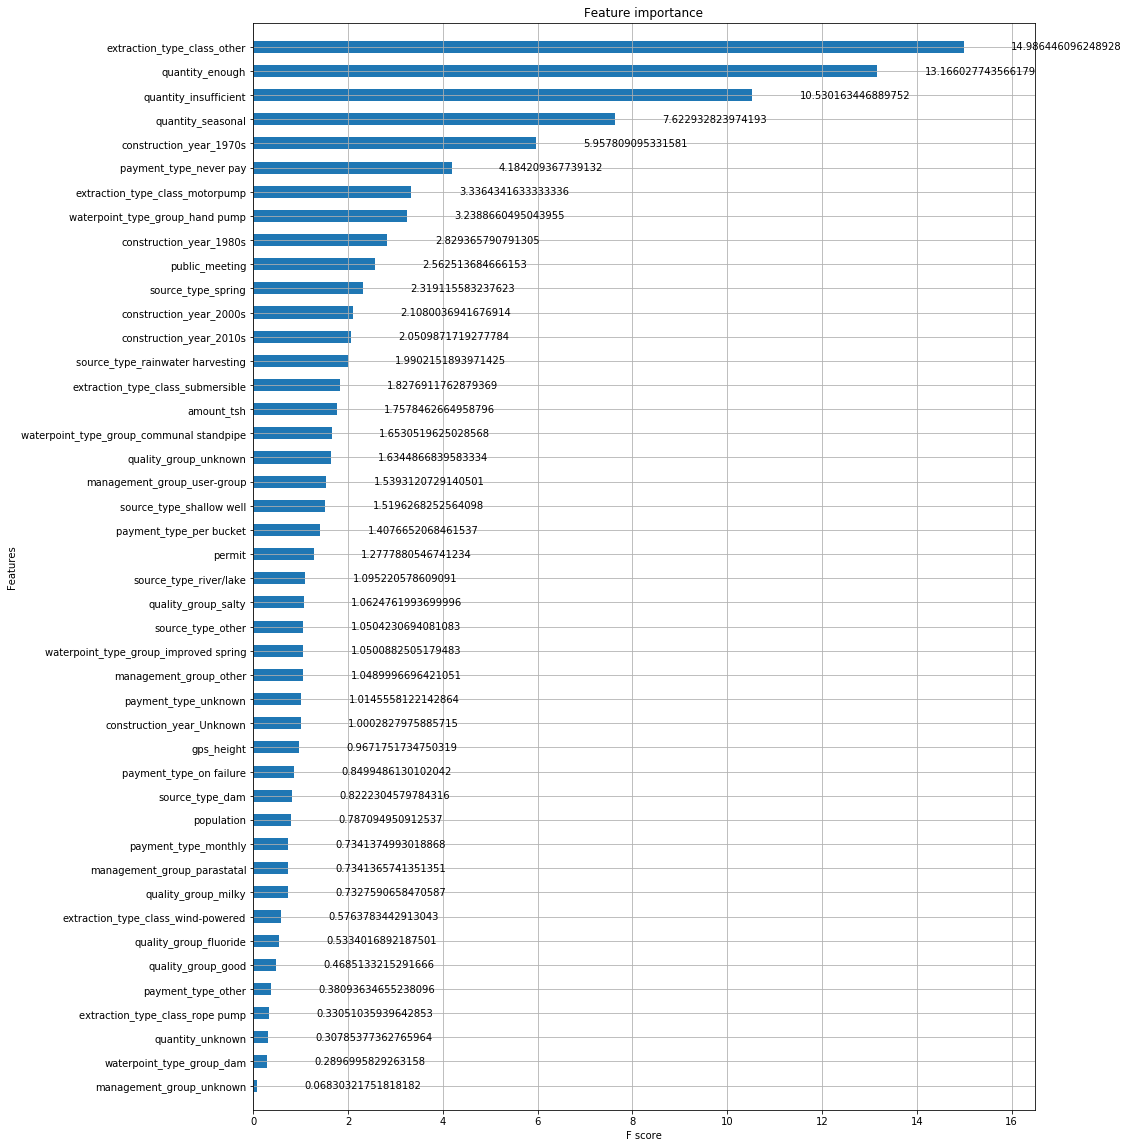

In [85]:
#fig, ax = plt.subplots(figsize=(10, 20))
#xgb.plot_importance(gbm)

#Cumulative information gain from tree splits on that feature
plt.rcParams["figure.figsize"] = (14, 20)

xgb.plot_importance(gbm, importance_type='gain', height = .5) 

